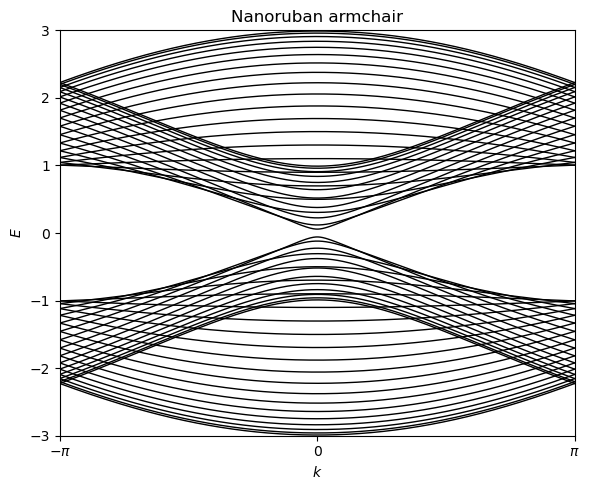

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres du modèle
t = 1.0       # Paramètre de saut (peut être ajusté)
N = 30      # Largeur du ruban (nombre de sous-bandes)
num_k = 1000   # Nombre de points en k

# Vecteur d'onde k entre -π et π
k_vals = np.linspace(-np.pi, np.pi, num_k)

# Préparation de la figure
plt.figure(figsize=(6, 5))

for r in range(1, N+1):
    # Quantification transverse
    p = r * np.pi / (N + 1)
    epsilon_p = 2.0 * np.cos(p)

    # Calcul de E(k, p) pour la branche positive et négative
    # E(k,p) = ± t sqrt(1 + 2 epsilon_p cos(k/2) + epsilon_p^2)
    E_plus = t * np.sqrt(1 + 2 * epsilon_p * np.cos(k_vals / 2) + epsilon_p**2)
    E_minus = -E_plus

    # Tracé des branches
    plt.plot(k_vals, E_plus, color='black', linewidth=1)
    plt.plot(k_vals, E_minus, color='black', linewidth=1)

# Ajustement des axes
plt.xlim(-np.pi, np.pi)
plt.ylim(-3, 3)  
# Paramétrage des graduations en k
plt.xticks([-np.pi, 0, np.pi], [r'$-\pi$', '0', r'$\pi$'])

# Labels et titre 
plt.xlabel(r'$k$')
plt.ylabel(r'$E$')
plt.title("Nanoruban armchair")

# Optionnel 
plt.grid(False)

# Affichage
plt.tight_layout()
plt.show()

# Implémentation de l'Hamiltonien pour un Nanoruban Armchair

Nous considérons un modèle tight-binding pour un nanoruban armchair de largeur $N$ (c'est-à-dire comportant $N$ cellules, chacune contenant deux sites $a$ et $b$).  
On travaille dans la base
$$
\{\,a_1,\,b_1,\,a_2,\,b_2,\,\dots,\,a_N,\,b_N\,\},
$$
et l'Hamiltonien en espace $k$ s'écrit
$$
H = \sum_{k} \Psi^\dagger(k)\, H(k)\, \Psi(k),
$$
avec
$$
\Psi^\dagger(k)=\Bigl(a_1^\dagger(k),\,b_1^\dagger(k),\,a_2^\dagger(k),\,b_2^\dagger(k),\,\dots,\,a_N^\dagger(k),\,b_N^\dagger(k)\Bigr).
$$

L'hamiltonien se décompose en deux contributions principales :

1. **Sauts intra–cellule**  
   Dans chaque cellule $m$ (pour $m=1,\dots,N$), les sites $a_m$ et $b_m$ sont couplés par une amplitude $t$ (sans facteur de phase).  
   Cela se traduit par :
   $$
   H_{2m-1,\,2m} = t \quad \text{et} \quad H_{2m,\,2m-1} = t.
   $$

2. **Sauts inter–cellule**  
   Entre deux cellules adjacentes $m$ et $m+1$ (pour $m=1,\dots,N-1$), on distingue deux types de couplages, tous deux associés à une amplitude $t$ :

   - **Type 1 :**  
     Relier le site $b_m$ de la cellule $m$ au site $a_{m+1}$ de la cellule $m+1$ (sans facteur de phase) :
     $$
     H_{2m,\,2(m+1)-2} = t \quad \text{et} \quad H_{2(m+1)-2,\,2m} = t.
     $$

   - **Type 2 :**  
     Relier le site $a_m$ de la cellule $m$ au site $b_{m+1}$ de la cellule $m+1$ avec un facteur de phase $e^{-ik\,a}$ (où $a$ est la constante de réseau) :
     $$
     H_{2m-1,\,2(m+1)-1} = t\,e^{-ik\,a} \quad \text{et} \quad H_{2(m+1)-1,\,2m-1} = t\,e^{ik\,a}.
     $$

L'expression générale de l'hamiltonien $H(k)$ utilisé dans le code est donc :
$$
\boxed{
\begin{aligned}
H(k) = & \sum_{m=1}^{N} \Bigl\{ \; t \Bigl[ a_m^\dagger(k)\, b_m(k) + b_m^\dagger(k)\, a_m(k) \Bigr] \Bigr\} \\
& + \sum_{m=1}^{N-1} \Biggl\{ \; t\, \Bigl[ b_m^\dagger(k)\, a_{m+1}(k) + a_{m+1}^\dagger(k)\, b_m(k) \Bigr] \\
& \quad\quad\quad\quad\; + \; t\, \Bigl[ e^{-ik\,a}\, a_m^\dagger(k)\, b_{m+1}(k) + e^{ik\,a}\, b_{m+1}^\dagger(k)\, a_m(k) \Bigr] \Biggr\}.
\end{aligned}
}
$$

Dans la représentation matricielle (de dimension $2N\times 2N$), on indexe les sites de la manière suivante :  
- Les indices $2m-1$ et $2m$ correspondent respectivement à $a_m$ et $b_m$ dans la cellule $m$.  
- Les termes intra–cellule se placent sur les éléments $(2m-1,\,2m)$ et $(2m,\,2m-1)$.  
- Les termes inter–cellule de type 1 se placent sur les éléments reliant $b_m$ et $a_{m+1}$, c'est-à-dire aux positions $(2m,\,2(m+1)-2)$ et $(2(m+1)-2,\,2m)$.  
- Les termes inter–cellule de type 2 se placent sur les éléments reliant $a_m$ et $b_{m+1}$, c'est-à-dire aux positions $(2m-1,\,2(m+1)-1)$ et $(2(m+1)-1,\,2m-1)$, avec le facteur de phase associé.

Pour $N=2$, on retrouve ainsi la matrice :
$$
H(k)=
\begin{pmatrix}
0 & t & 0 & t\,e^{-ik\,a} \\
t & 0 & t & 0 \\
0 & t & 0 & t \\
t\,e^{ik\,a} & 0 & t & 0
\end{pmatrix}.
$$

Le code Python ci-dessous implémente cet hamiltonien et calcule la structure de bandes pour $k$ variant de $-\pi$ à $\pi$.

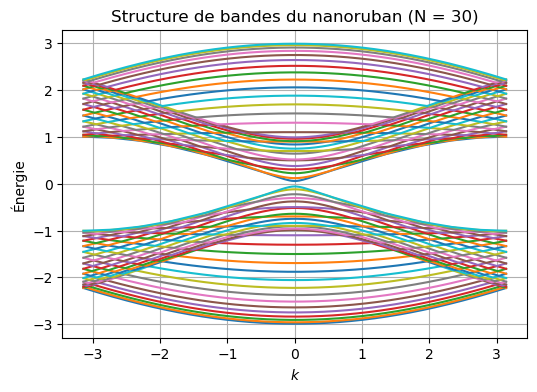

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres
a = 1.0                    # Constante de réseau
kpts = np.linspace(-np.pi/a, np.pi/a, 500)
t = -1.0                   # Amplitude de saut intra–cellule
te = -1.0          # Amplitude de saut inter–cellule
N = 30                      # Largeur du nanoruban

def hamiltonian_k(k, N, a, t, te):
    """
    Construit la matrice du Hamiltonien H(k) de dimension 2N x 2N,
    dans la base [a1, b1, a2, b2, ..., aN, bN].

    - Sauts intra–cellule : pour chaque cellule m,
      H[2*m-2, 2*m-1] = t et H[2*m-1, 2*m-2] = t.

    - Sauts inter–cellule (de la cellule m à m+1 pour m = 1,..,N-1) :
      * Type 1 : entre b_m et a_{m+1} (sans phase) : H[2*m-1, 2*(m+1)-2] = te.
      * Type 2 : entre a_m et b_{m+1} (avec phase) : H[2*m-2, 2*(m+1)-1] = te * exp(-1j*k*a).
    """
    dim = 2 * N
    H = np.zeros((dim, dim), dtype=complex)

    # Sauts intra–cellule : pour chaque cellule m (de 1 à N)
    for m in range(1, N+1):
        i = 2*m - 2  # indice de a_m (Python: 0-indexé)
        j = 2*m - 1  # indice de b_m
        H[i, j] = t
        H[j, i] = t

    # Sauts inter–cellule : pour m de 1 à N-1 (entre cellule m et m+1)
    for m in range(1, N):
        # Type 1 : liaison entre b_m (cellule m) et a_{m+1} (cellule m+1) sans phase
        i = 2*m - 1              # indice de b_m
        j = 2*(m + 1) - 2        # indice de a_{m+1}
        H[i, j] = te
        H[j, i] = te

        # Type 2 : liaison entre a_m (cellule m) et b_{m+1} (cellule m+1) avec facteur de phase e^{-ik*a}
        i = 2*m - 2              # indice de a_m
        j = 2*(m + 1) - 1        # indice de b_{m+1}
        H[i, j] = te * np.exp(-1j * k * a)
        H[j, i] = te * np.exp(1j * k * a)

    return H

def energy(k, N, a, t, te):
    H = hamiltonian_k(k, N, a, t, te)
    E, _ = np.linalg.eig(H)
    return np.sort(E)

# Calcul des énergies pour chaque k
E_all = np.array([energy(k, N, a, t, te) for k in kpts])

# Affichage de la structure de bandes
plt.figure(figsize=(6, 4))
for band in range(2 * N):
    plt.plot(kpts, E_all[:, band].real)
plt.xlabel('$k$')
plt.ylabel('Énergie')
plt.title(f'Structure de bandes du nanoruban (N = {N})')
plt.grid(True)
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, fixed
from IPython.display import display

# Note: Ce code est conçu pour être exécuté dans un environnement Jupyter Notebook/Lab

# --- Paramètres Physiques Globaux ---
a = 1.0 # Distance C-C (simplifié à 1.0 pour la phase k*a -> k)
t = -1.0 # Intégrale de saut (énergie)

# --- Échantillonnage de k ---
# k va de -pi à pi car nous avons posé a=1
num_k_points = 3000
kpts = np.linspace(-np.pi, np.pi, num_k_points)

def hamiltonian_k_armchair(k, N, a, t):
    """
    Construit la matrice du Hamiltonien H(k) de dimension 2N x 2N pour un ruban armchair,
    dans la base [a1, b1, a2, b2, ..., aN, bN].
    Utilise un seul paramètre de saut t.
    (Identique à la version précédente)
    """
    dim = 2 * N
    H = np.zeros((dim, dim), dtype=complex)

    # Sauts intra–dimère (vertical sur le dessin classique) : type t
    for m in range(N): # m de 0 à N-1 (indices Python)
        idx_a = 2*m
        idx_b = 2*m + 1
        H[idx_a, idx_b] = t
        H[idx_b, idx_a] = t # Hermitien

    # Sauts inter–dimères : type t également
    for m in range(N - 1): # m de 0 à N-2
        # Liaison b_m -> a_{m+1} (diagonale sans phase k)
        idx_b_m = 2*m + 1
        idx_a_m_plus_1 = 2*(m + 1)
        H[idx_b_m, idx_a_m_plus_1] = t
        H[idx_a_m_plus_1, idx_b_m] = t # Hermitien

        # Liaison a_m -> b_{m+1} (diagonale avec phase k*a)
        idx_a_m = 2*m
        idx_b_m_plus_1 = 2*(m + 1) + 1
        phase_factor = t * np.exp(-1j * k * a) # a est le paramètre de maille effectif le long de k
        H[idx_a_m, idx_b_m_plus_1] = phase_factor
        H[idx_b_m_plus_1, idx_a_m] = np.conjugate(phase_factor) # Hermitien

    return H

def calculer_et_tracer_bandes_dos_armchair(N, t, a, kpts, num_energy_bins=500):
    """
    Calcule et trace la structure de bandes et la densité d'états (DOS)
    pour un ruban armchair, avec des étiquettes d'axe k spécifiques.
    """
    # 1. Calculer les bandes
    num_k = len(kpts)
    num_bands_total = 2 * N
    E_nk = np.zeros((num_k, num_bands_total))

    for i, k in enumerate(kpts):
        Hk = hamiltonian_k_armchair(k, N, a, t)
        vals = np.linalg.eigvalsh(Hk)
        E_nk[i, :] = vals

    # 2. Préparer les données pour la DOS
    all_energies = E_nk.flatten()

    # 3. Calculer l'histogramme (DOS)
    dos, bin_edges = np.histogram(all_energies, bins=num_energy_bins, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # 4. Tracer les résultats sur deux sous-graphiques
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # --- Tracé de la Structure de Bandes (ax1) ---
    # k_labels va de -1 à 1 (car kpts va de -pi à pi et a=1)
    k_labels_norm = kpts / np.pi

    for i in range(num_bands_total):
        ax1.plot(k_labels_norm, E_nk[:, i], color='blue', linewidth=1.5)

    ax1.set_xlabel(r'$k a / \pi$') # Étiquette de l'axe
    ax1.set_ylabel(r'Énergie $E / |t|$')
    ax1.set_title(f'Structure de Bandes Armchair (N = {N})')
    ax1.set_xlim(-1, 1) # Limites numériques de l'axe x

    # *** Modification pour les étiquettes de l'axe x ***
    # Définir les positions des graduations (ticks) en coordonnées normalisées (-1 à 1)
    tick_positions = [-1, -2/3, 0, 2/3, 1]
    # Définir les étiquettes correspondantes en format LaTeX
    tick_labels = [r'$-\pi$', r'$-2\pi/3$', '0', r'$2\pi/3$', r'$\pi$']
    ax1.set_xticks(tick_positions)
    ax1.set_xticklabels(tick_labels)
    # ****************************************************

    # Ajuster les limites y
    min_E = np.min(E_nk)
    max_E = np.max(E_nk)
    padding = abs(t) * 0.2
    ax1.set_ylim(min(min_E - padding, t*3.2), max(max_E + padding, -t*3.2))
    ax1.grid(True, linestyle=':', alpha=0.7)
    ax1.axhline(0, color='red', linestyle='--', linewidth=1)


    # --- Tracé de la Densité d'États (ax2) ---
    ax2.plot(dos, bin_centers, color='green', linewidth=1.5)
    ax2.set_xlabel(r'Densité d\'États (unités arb.)')
    ax2.set_ylabel(r'Énergie $E / |t|$')
    ax2.set_title(f'Densité d\'États Armchair (N = {N})')
    ax2.set_ylim(ax1.get_ylim()) # Assurer la même échelle d'énergie
    ax2.grid(True, linestyle=':', alpha=0.7)
    ax2.axhline(0, color='red', linestyle='--', linewidth=1)

    plt.tight_layout()
    plt.show()

# --- Création du Widget Interactif ---

n_slider_armchair = IntSlider(
    min=2, max=300, step=1, value=150,
    description='Largeur N:', continuous_update=False
)

interactive_plot_armchair = interact(
    calculer_et_tracer_bandes_dos_armchair,
    N=n_slider_armchair,
    t=fixed(t),
    a=fixed(a),
    kpts=fixed(kpts),
    num_energy_bins=fixed(500)
)

interactive(children=(IntSlider(value=150, continuous_update=False, description='Largeur N:', max=300, min=2),…

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import lil_matrix
from ipywidgets import interact, IntSlider, fixed
from IPython.display import display

# --- Paramètres Physiques Globaux ---
a = 1.0 # Distance C-C (simplifié à 1.0 pour la phase k*a -> k)
t = -1.0 # Intégrale de saut (énergie)

# --- Échantillonnage de k (réduit pour des calculs plus rapides) ---
num_k_points = 300  # Réduit de 3000 à 300 pour plus de rapidité
kpts = np.linspace(-np.pi, np.pi, num_k_points)

def hamiltonian_k_armchair_sparse(k, N, a, t):
    """
    Construit la matrice du Hamiltonien H(k) creuse de dimension 2N x 2N pour un ruban armchair,
    dans la base [a1, b1, a2, b2, ..., aN, bN].
    Utilise lil_matrix pour une construction efficace.
    """
    dim = 2 * N
    # Utiliser lil_matrix pour la construction élément par élément
    H = lil_matrix((dim, dim), dtype=complex)

    # Sauts intra–dimère (vertical sur le dessin classique) : type t
    for m in range(N): # m de 0 à N-1 (indices Python)
        idx_a = 2*m
        idx_b = 2*m + 1
        H[idx_a, idx_b] = t
        H[idx_b, idx_a] = t # Hermitien

    # Sauts inter–dimères : type t également
    for m in range(N - 1): # m de 0 à N-2
        # Liaison b_m -> a_{m+1} (diagonale sans phase k)
        idx_b_m = 2*m + 1
        idx_a_m_plus_1 = 2*(m + 1)
        H[idx_b_m, idx_a_m_plus_1] = t
        H[idx_a_m_plus_1, idx_b_m] = t # Hermitien

        # Liaison a_m -> b_{m+1} (diagonale avec phase k*a)
        idx_a_m = 2*m
        idx_b_m_plus_1 = 2*(m + 1) + 1
        phase_factor = t * np.exp(-1j * k * a) # a est le paramètre de maille effectif le long de k
        H[idx_a_m, idx_b_m_plus_1] = phase_factor
        H[idx_b_m_plus_1, idx_a_m] = np.conjugate(phase_factor) # Hermitien

    # Convertir en format CSR pour des calculs efficaces
    return H.tocsr()

def calculer_et_tracer_bandes_dos_armchair_sparse(N, t, a, kpts=None, num_energy_bins=200):
    """
    Calcule et trace la structure de bandes et la densité d'états (DOS)
    pour un ruban armchair, en utilisant des matrices creuses.
    """
    # Si kpts n'est pas fourni, utiliser la valeur par défaut
    if kpts is None:
        num_k_points = 300  # Valeur optimisée par défaut
        kpts = np.linspace(-np.pi, np.pi, num_k_points)
    
    # 1. Calculer les bandes
    num_k = len(kpts)
    num_bands_total = 2 * N
    E_nk = np.zeros((num_k, num_bands_total))

    for i, k in enumerate(kpts):
        Hk = hamiltonian_k_armchair_sparse(k, N, a, t)
        # Conversion en matrice dense pour le calcul des valeurs propres
        vals = np.linalg.eigvalsh(Hk.toarray())
        E_nk[i, :] = vals

    # 2. Préparer les données pour la DOS
    all_energies = E_nk.flatten()

    # 3. Calculer l'histogramme (DOS)
    dos, bin_edges = np.histogram(all_energies, bins=num_energy_bins, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # 4. Tracer les résultats sur deux sous-graphiques
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # --- Tracé de la Structure de Bandes (ax1) ---
    # k_labels va de -1 à 1 (car kpts va de -pi à pi et a=1)
    k_labels_norm = kpts / np.pi

    for i in range(num_bands_total):
        ax1.plot(k_labels_norm, E_nk[:, i], color='blue', linewidth=1.5)

    ax1.set_xlabel(r'$k a / \pi$') # Étiquette de l'axe
    ax1.set_ylabel(r'Énergie $E / |t|$')
    ax1.set_title(f'Structure de Bandes Armchair (N = {N})')
    ax1.set_xlim(-1, 1) # Limites numériques de l'axe x

    # Définir les positions des graduations (ticks) en coordonnées normalisées (-1 à 1)
    tick_positions = [-1, -2/3, 0, 2/3, 1]
    # Définir les étiquettes correspondantes en format LaTeX
    tick_labels = [r'$-\pi$', r'$-2\pi/3$', '0', r'$2\pi/3$', r'$\pi$']
    ax1.set_xticks(tick_positions)
    ax1.set_xticklabels(tick_labels)

    # Ajuster les limites y
    min_E = np.min(E_nk)
    max_E = np.max(E_nk)
    padding = abs(t) * 0.2
    ax1.set_ylim(min(min_E - padding, t*3.2), max(max_E + padding, -t*3.2))
    ax1.grid(True, linestyle=':', alpha=0.7)
    ax1.axhline(0, color='red', linestyle='--', linewidth=1)

    # --- Tracé de la Densité d'États (ax2) ---
    ax2.plot(dos, bin_centers, color='green', linewidth=1.5)
    ax2.set_xlabel(r'Densité d\'États (unités arb.)')
    ax2.set_ylabel(r'Énergie $E / |t|$')
    ax2.set_title(f'Densité d\'États Armchair (N = {N})')
    ax2.set_ylim(ax1.get_ylim()) # Assurer la même échelle d'énergie
    ax2.grid(True, linestyle=':', alpha=0.7)
    ax2.axhline(0, color='red', linestyle='--', linewidth=1)

    plt.tight_layout()
    plt.show()

# --- Création du Widget Interactif ---
def interface_graphique_armchair():
    n_slider_armchair = IntSlider(
        min=2, max=225, step=1, value=200,
        description='Largeur N:', continuous_update=False
    )
    
    # Utiliser des kpoints personnalisés pour l'interface interactive
    custom_kpts = np.linspace(-np.pi, np.pi, 300)
    
    interactive_plot_armchair = interact(
        calculer_et_tracer_bandes_dos_armchair_sparse,
        N=n_slider_armchair,
        t=fixed(t),
        a=fixed(a),
        kpts=fixed(custom_kpts),
        num_energy_bins=fixed(200)  # Réduit pour des calculs plus rapides
    )
    
    return interactive_plot_armchair

# Exécuter l'interface
interface_graphique_armchair()

interactive(children=(IntSlider(value=200, continuous_update=False, description='Largeur N:', max=225, min=2),…

<function __main__.calculer_et_tracer_bandes_dos_armchair_sparse(N, t, a, kpts=None, num_energy_bins=200)>